

Build **kNN** and **logistic regression** classifiers using sklearn library to predict "passed" (label variable) by using given data. 
- Start the project with data processing such as converting non-numeric values to numerical ones,  data normalization, etc.
- Explore and analyze the data using feature visualization such as correlation heatmap, and distribution plots by commenting on your findings. Choose min. 3 features for the visualization step. 
- Then, shuffle and split your data into train and test sets randomly, with a ratio of 70:30. (Write your own shuffling and spliting code, do not use predefined function train_test_split).
- Build your models (with proper comments and explanations) using the training set.
- Compare these 2 classification models according to their accuracies (you can print accuracy values in a single table as a comprehensive view) over the test set. Comment on their classification performance.
- Plot confusion matrices for your models over the test set, and comment on the outcomes. 
- Finally, plot Precision-Recall (PR) curves for each classification model over the test set and evaluate/comment the prediction performance of each classifier. 

Notes:

* Choose the optimal k value using Minkowski distance (by trying two different p-values) for the kNN model.


* **Don't forget to add comments to your code lines to explain how your program works, and your intentions behind it. Also, do not forget to comment on the outcomes and comparisons.** 

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
df = pd.read_csv("data.csv")

In [16]:
df.isna().values.any()
#Since this returns false we are sure there is no na value

False

To make dataset more convenient, I've converted non numerical values to numerical values in the following way.
- school -> GP/MS to 0/1
- sex -> F/M to 0/1
- adress -> U/R   to  lives_in_urban 0/1     Not living in urban means he/she lives in rural area
- famsize -> LE3/GT3  to  crowded_house 0/1     Crowded means >3 ppl in house
- Pstatus -> T/A  to  Ptogether 0/1     0 represents they are seperate 1 represents they are together
- Mjob/Fjob -> teacher/health/services/at_home/other  to  1 2 3 4 0
- reason -> home/reputation/course/other  to  1 2 3 0
- guardian -> mother/father/other     to  1 2 0
- schoolsup,famsup,paid,activities,nursery,higher,internet,romantic -> yes/no to  1/0

In [17]:
df = df.replace(['GP','F','R','LE3','A','other','no'],'0')
df = df.replace(['MS','M','U','GT3','T','teacher','home','mother','yes'],'1')
df = df.replace(['health','reputation','father'],'2')
df = df.replace(['services','course'],'3')
df = df.replace(['at_home'],'4')
df.rename(columns={'address':'lives_in_urban','famsize':'crowded_house','Pstatus':'Ptogether',},inplace=True)

Since we are working with classification with numeric data, I have normalized all values between 0 and 1

In [18]:
df = df.astype(int)
scaler = preprocessing.MinMaxScaler()
names = df.columns
d = scaler.fit_transform(df)
df = pd.DataFrame(d, columns=names)

To see Correlation of pass rate with other features I have plotted the correlation graph

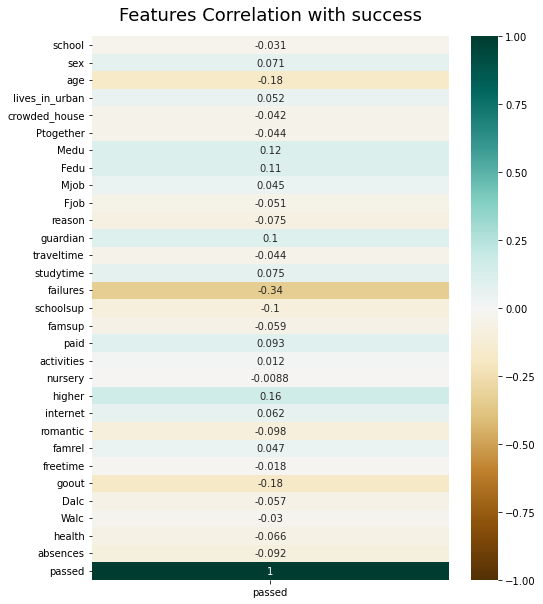

In [19]:
corr = df.corr()
plt.figure(figsize=(8, 10))
heatmap = sns.heatmap(df.corr()[['passed']], vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlation with success', fontdict={'fontsize':18}, pad=16)
plt.show()

To see every features distribution, I have plotted histograms of each feature

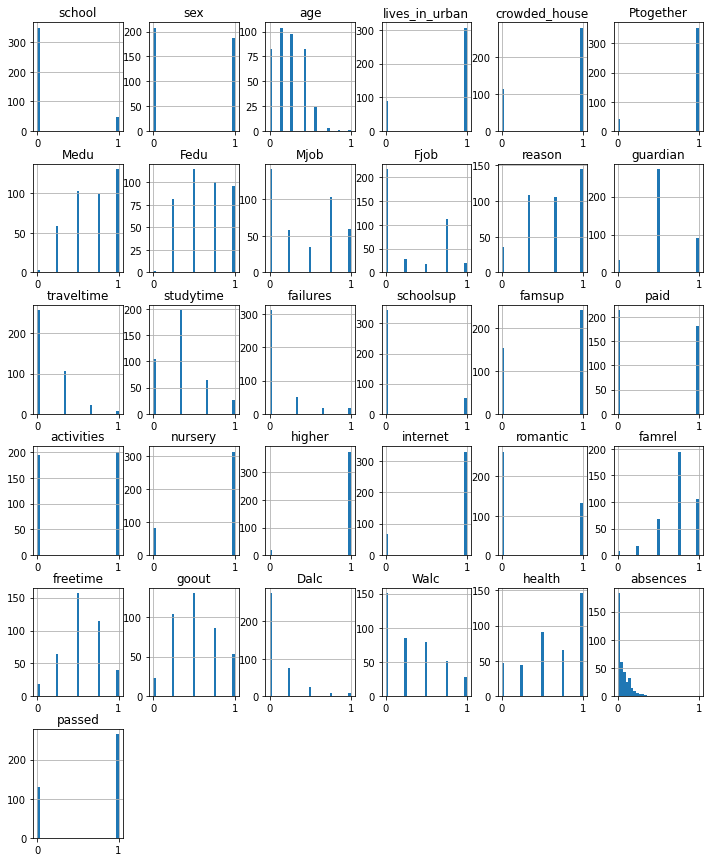

In [20]:
df.hist(bins=31, figsize=(12, 15))
plt.show()

Shuffle the data set and create %70-%30 train-test set

In [21]:
df = df.sample(frac = 1)
#Shuffled the data set

seventyPer = int(df.shape[0]/10*7)

train_data = df.iloc[:seventyPer,:]
x_train = train_data.drop(columns="passed")
y_train = train_data["passed"]

test_data = df.iloc[seventyPer:,:]
x_test = test_data.drop(columns="passed")
y_test = test_data["passed"]

In [22]:
def minkowski_distance(p1,p2,p):
    return sum(abs(e1-e2)**p for e1, e2 in zip(p1,p2))**(1/p)

To train my kNN model, I have calculated distances for each K value to find which K is optimal for my model.

11


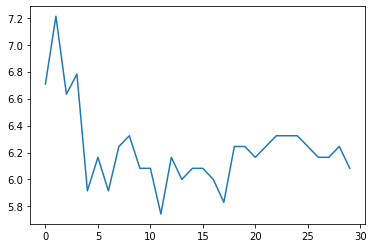

In [23]:

minkowskiDistancesForK = {}
for i in range(30):
    knnModel = KNeighborsClassifier(n_neighbors=i+1,p=2)
    knnModel.fit(x_train, y_train)
    trainPredictions = knnModel.predict(x_test)
    minkowskiDist = minkowski_distance(y_test, trainPredictions,2)
    minkowskiDistancesForK[i] = minkowskiDist
#So we trained the model with x_train,y_train data.
#Hold k values with their distances
plt.plot(minkowskiDistancesForK.keys(),minkowskiDistancesForK.values())
minDistance = min(minkowskiDistancesForK.values())
for k in minkowskiDistancesForK:
    if minkowskiDistancesForK[k]==minDistance:
        minK = k

#Hold the minMse value and its corresponding K. I will use this K in model
print(minK)

I trained my kNN Model with most suitable K value. And obtained an accuracy score for my Model

In [24]:
knnModel = KNeighborsClassifier(n_neighbors=minK,p=2)
knnModel.fit(x_train,y_train)
knnPredictions = knnModel.predict(x_test)
knnAccuracy = metrics.accuracy_score(y_test,knnPredictions)

I trained my Logistic Regression Model and obtained an accuracy score for my Model

In [25]:
logModel = LogisticRegression(max_iter=250)
logModel.fit(x_train,y_train)
logPredictions = logModel.predict(x_test)
logAccuracy = metrics.accuracy_score(y_test,logPredictions)

By looking at my Accuracies I can say that my Logistic Regression Model makes better predictions.
**(It differs depending on models. Sometimes kNN Model makes better predictions )**

In [26]:
accuracies_df = pd.DataFrame([("Knn Model",knnAccuracy),("LogisticRegression Model",logAccuracy)],columns=("Model Name","Accuracy")).set_index("Model Name")
accuracies_df

,Accuracy
Model Name,
Knn Model,0.689076
LogisticRegression Model,0.722689


I draw confusion matrixes for each Model. This are my observations:
- Both my models has low False Negative(FN) and True Negative(TN)
- Since my False Negative(FN) is low despite my True Positive(TP). My model has a high Recall rate which is good
- Both my models has high False Positive(FP) 
- Since my False Positive(FP) is high, my Model has low Precision 
- If we look at overall Accuracy my Model makes quite good predictions

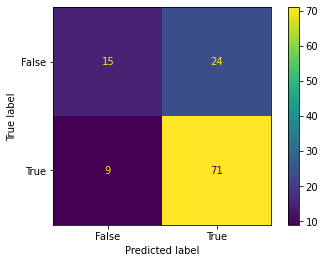

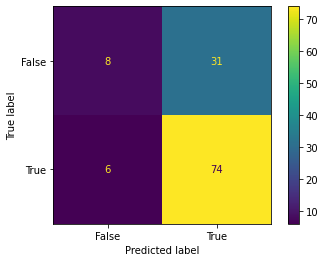

In [27]:
confusion_matrix = metrics.confusion_matrix(y_test,logPredictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
confusion_matrix = metrics.confusion_matrix(y_test,knnPredictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

Because both my Models has low Precision rate, Precision-Recall Curve is not going close to Precision=1 Recall=1 corner. Which means our model is not making the best predictions. But since it is over the Precision+Recall = 1 line, I can say my Model is at least making some good predictions.

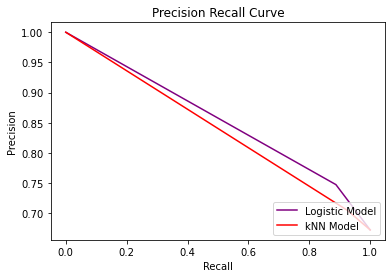

In [28]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test,logPredictions)
plt.plot(recall, precision, color='purple',label="Logistic Model")
plt.title('Precision Recall Curve')
plt.ylabel('Precision')
plt.xlabel('Recall')
precision, recall, thresholds = metrics.precision_recall_curve(y_test,knnPredictions)
plt.plot(recall, precision, color='red',label='kNN Model')
plt.legend(loc = 4)
plt.show()

Both my Models could not make  predictions quite good. I think this problem caused by lack of data to train my Model better